Project Description
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

Bussiness/Social Implication
Baseball is the third most popular sport in America with an Average audience of 68.48 million according to Wikipedia

The objective is to predict the number of wins based on the input parameters

-- Input features-
1.	W (Win)- This indicates the number of Wins credited to a pitcher: 
2.	R (Run) - This indicates Runs scored. 
3.	AB (At Bat)- This means At bat or time at bat. 
4.	H (Hit)- This means Hit. 
5.	2B (Double) - This means the act of a batter striking the pitched ball 
6.	3B (Tripples) - This measns a Triple.
7.	HR (Homeruns) - This means Home runs.
8.	BB (Walks) - This means Base on balls (also called a "walk"). 
9.	SO (Strikeouts) - Also denoted as "K" means Strikeout. 
10.	SB (Stolen bases) - This means Stolen base.
11.	RA (Runs Allowed) - This means Run Average. It refer to measures of the rate at which runs are allowed or scored.
12.	ER (Earned Runs) - This means Earned run. 
13.	ERA (Earned run average) - This means Earned Run Average. 
14.	CG (Shoutout)- This means Complete Game. 
15.	SHO - This means Shutout.
16.	SV (Complete Games)- This means Save.
17.	E - This means Errors.

-- Output: Number of predicted wins (W)


Steps to Follow for the Project: The dataset contains 17 features and 30 samples
Below are the steps to follow for the project:

Import the required libraries and data.
Do the careful EDA analysis, preprocessing and feature engineering on the given data.
Build/Test multiple models on the same dataset.
Check underfitting/overfitting,  avoid underfitting or overfitting (bias/variance) , cross validation and all performance parameters(metrics) for all models depending on the problem type.
Try to achieve a model with good performance.
Select the best/final performing model and explain on what basis you have selected the particular model as a final model.
Do hyper parameter tuning on the final/best model or on all models.
Save the best model for production and convey on which basis you have chosen that model.
Make the documentation and write your findings in the same file i.e. ipynb

# 1: Importing required Libraries and data

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import utils
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import datasets,linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import warnings 
warnings.filterwarnings('ignore')
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate,KFold,cross_val_score
from sklearn.metrics import  roc_curve, roc_auc_score
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier)

In [2]:
# Loading the dataset downloaded from kaggle
baseball_dt=pd.read_csv('baseball.csv')
baseball_dt.head(10)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [3]:
baseball_dt.shape # to determine the shape of the dataset

(30, 17)

# 2: Data Cleaning and Transfroming (Exploratory Data Analysis)

In [4]:
baseball_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [5]:
baseball_dt.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


All the features are numericaland will be good for analysis

In [6]:
# Checking for missing values
baseball_dt.isnull().sum() 

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

<AxesSubplot:>

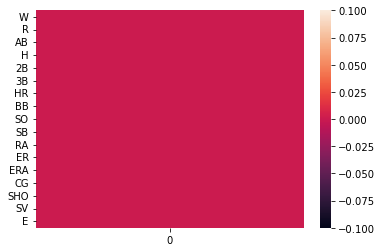

In [7]:
# Using Heat map to check for null values
sns.heatmap(baseball_dt.isnull().sum().to_frame())

In [8]:
# There is no missing values in the dataset and the dataset is appropriate for the prediction

In [9]:
# Determine the unique values for win Quantity
win_qty = baseball_dt["W"].value_counts()
win_qty

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64

In [10]:
def features_plot(baseball_dt,i):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,2)
    sns.histplot(x=i,data=baseball_dt,kde=True)
    plt.subplot(1,3,3)
    sns.regplot(x=i,y='W',data=baseball_dt)
    plt.subplot(1,3,1)
    sns.boxplot(y=i,data=baseball_dt)
    plt.show()

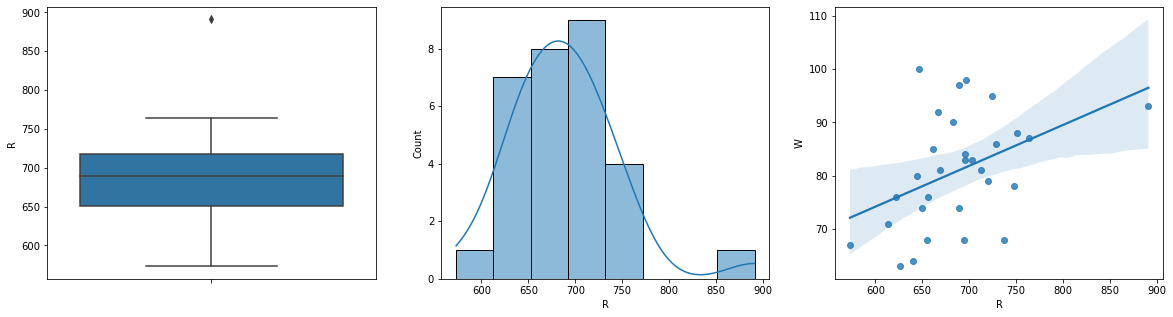

In [11]:
features_plot(baseball_dt,'R') # to plot R (run) against Win

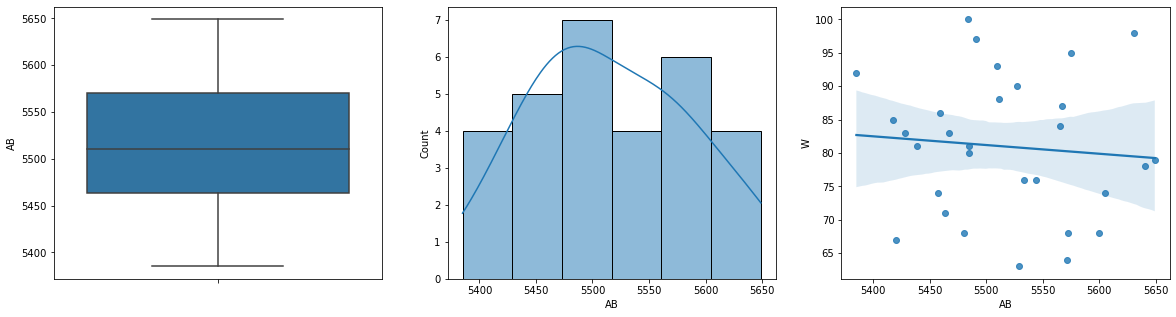

In [12]:
features_plot(baseball_dt,'AB') # to plot AB (At Bat) against Win

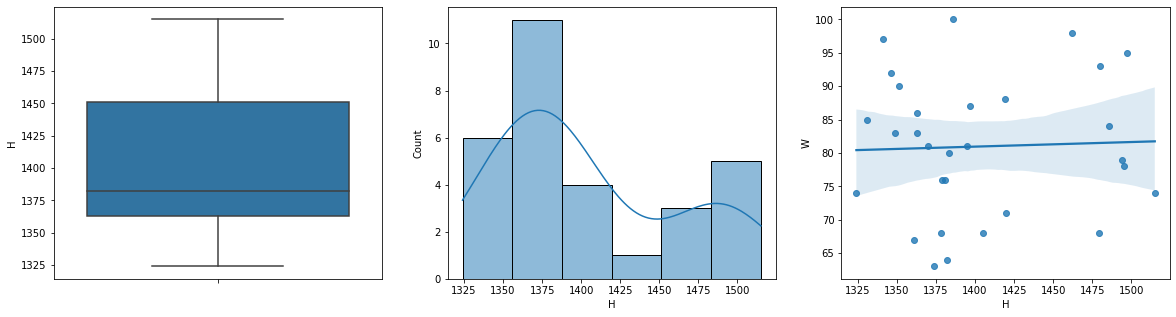

In [13]:
features_plot(baseball_dt,'H') # to plot H (Hit) against Win

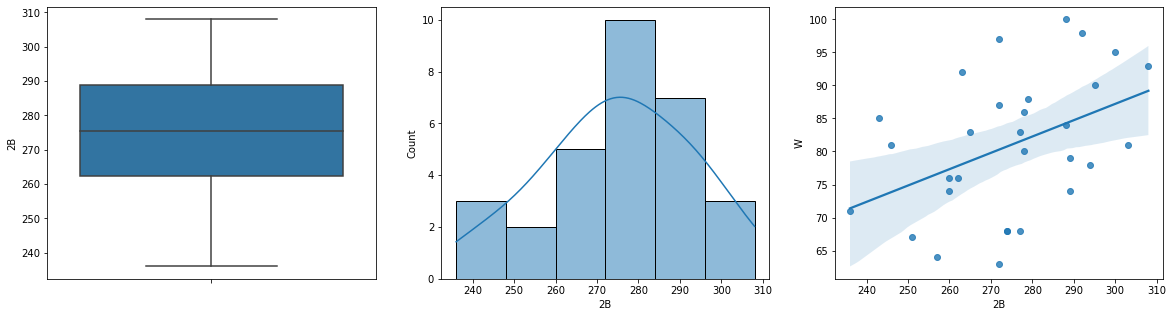

In [14]:
features_plot(baseball_dt,'2B') # to plot 2B (Double) against Win

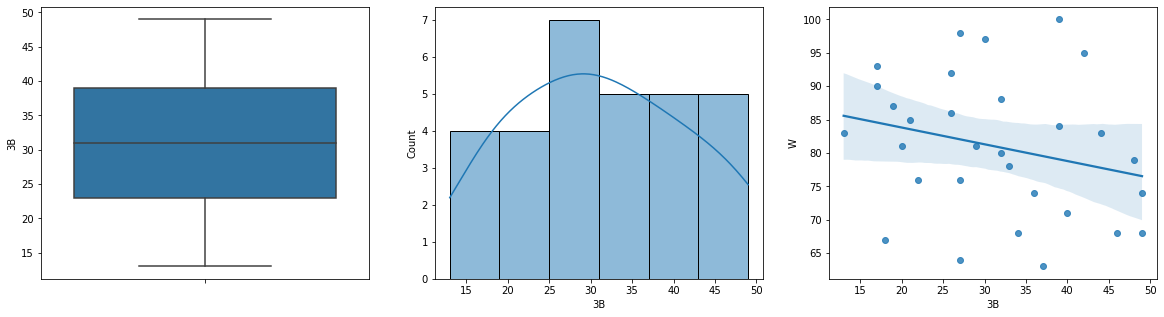

In [15]:
features_plot(baseball_dt,'3B') # to plot 3B (Tripple) against Win

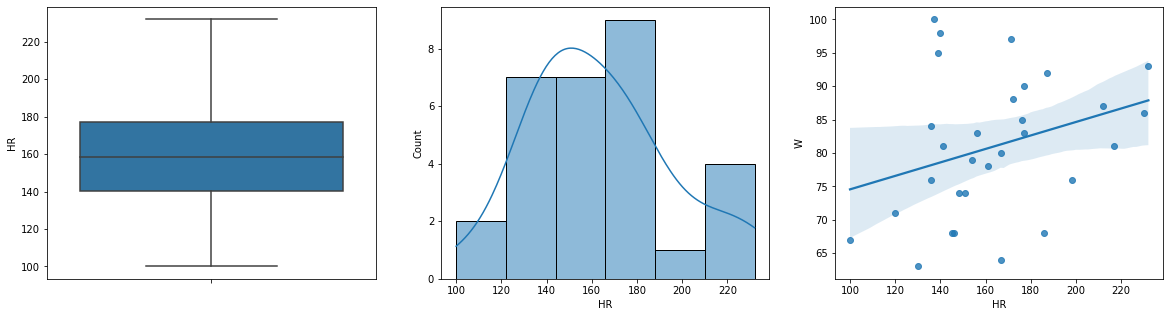

In [16]:
features_plot(baseball_dt,'HR') # to plot HR (Home Runs) against Win

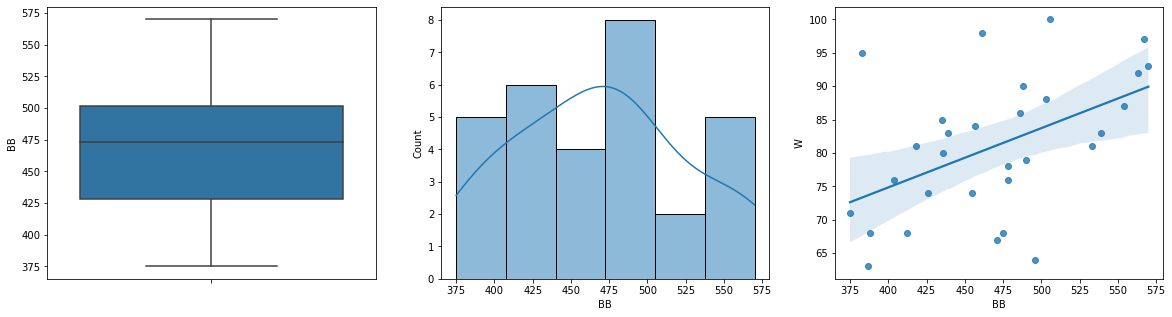

In [17]:
features_plot(baseball_dt,'BB') # to plot BB (Walk) against Win

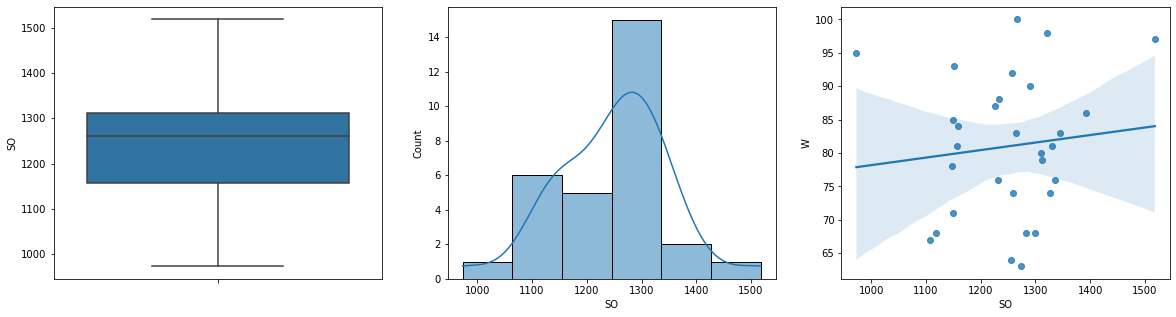

In [18]:
features_plot(baseball_dt,'SO') # to plot SO (Strikeout) against Win

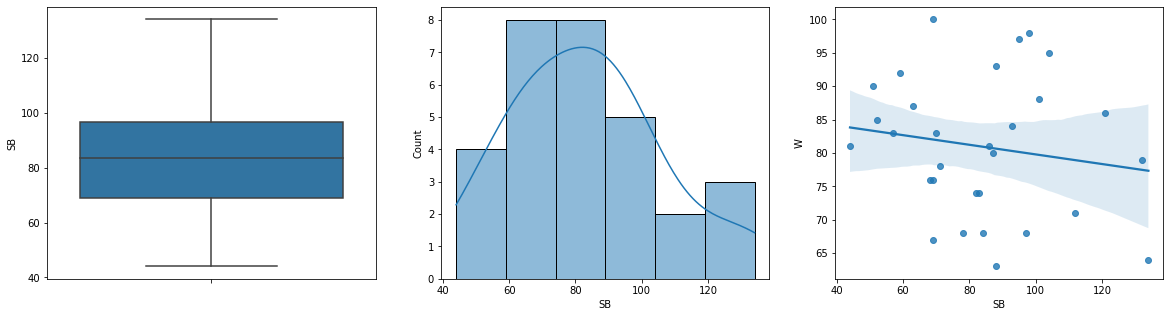

In [19]:
features_plot(baseball_dt,'SB') # to plot SB (Stolenbases) against Win

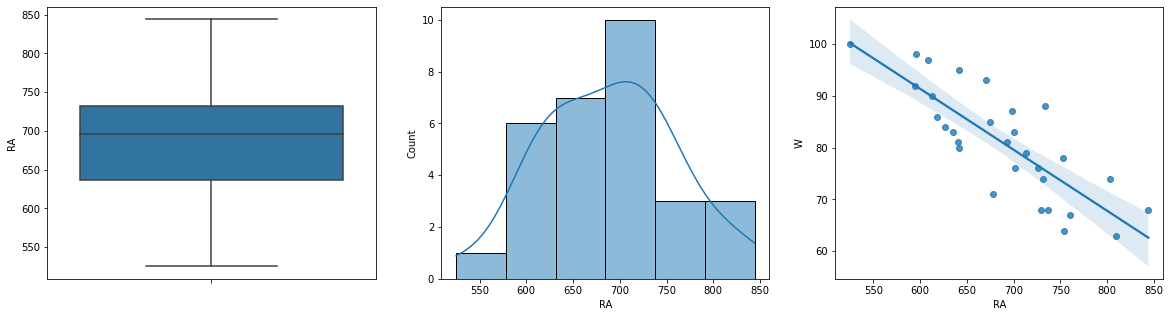

In [20]:
features_plot(baseball_dt,'RA') # to plot RA (Runs Allowed) against Win

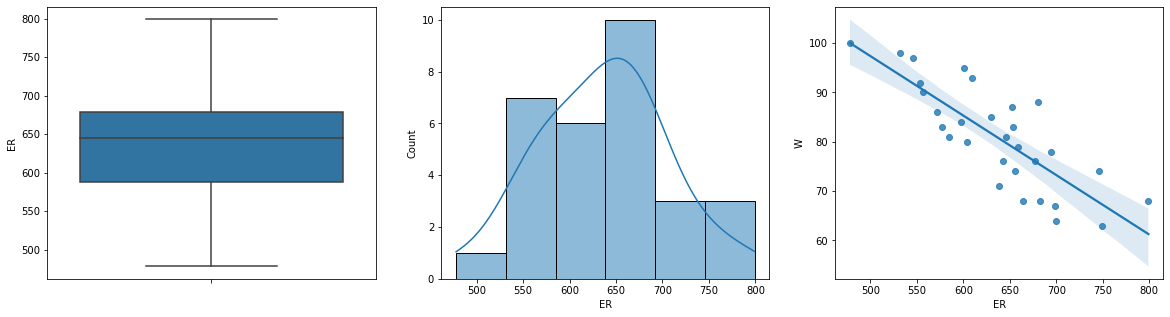

In [21]:
features_plot(baseball_dt,'ER') # to plot ER (Earned Runs) against Win

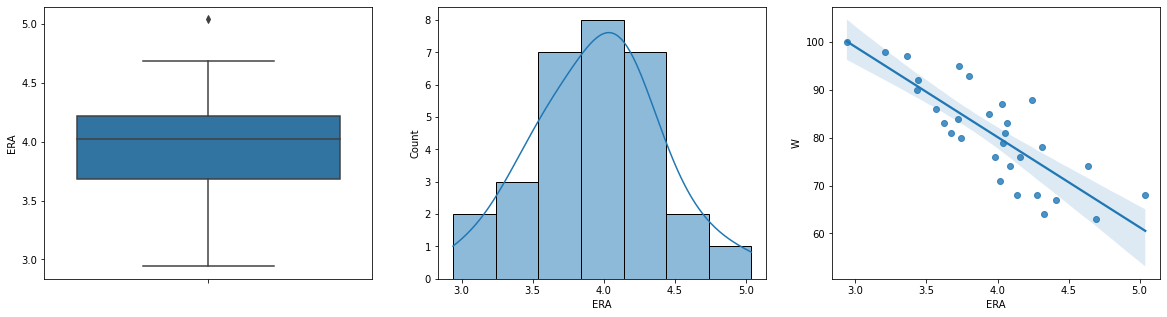

In [22]:
features_plot(baseball_dt,'ERA') # to plot ERA (Earned Runs with Average) against Win

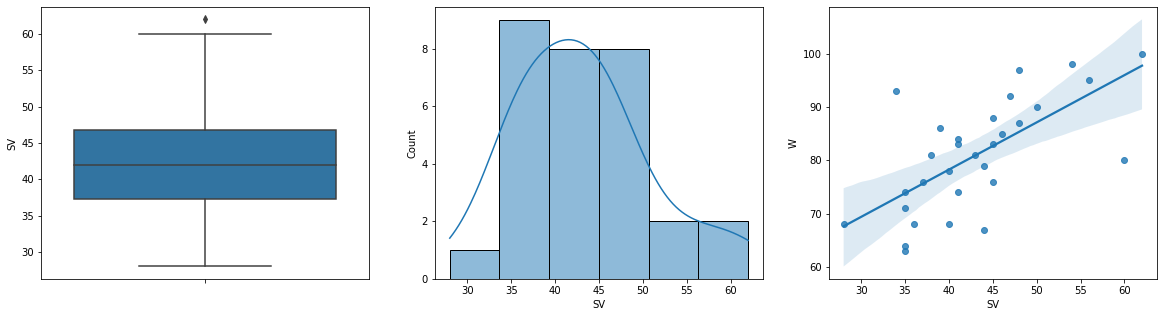

In [23]:
features_plot(baseball_dt,'SV') # to plot SV (Saves) against Win

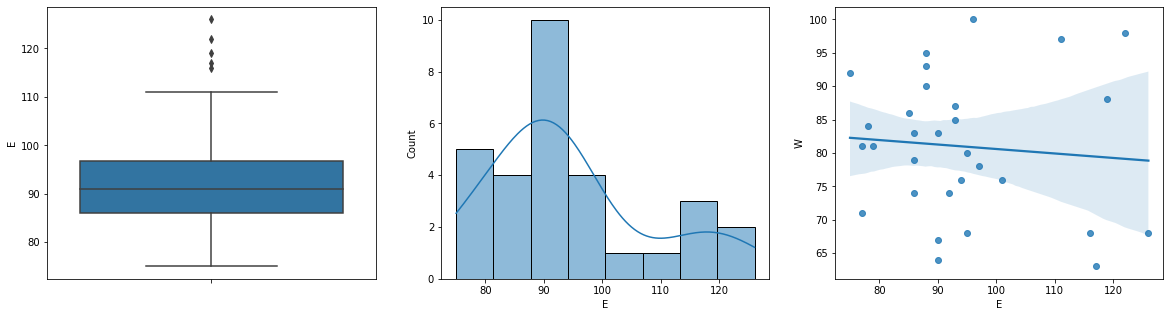

In [24]:
features_plot(baseball_dt,'E') # to plot E (Error) against Win

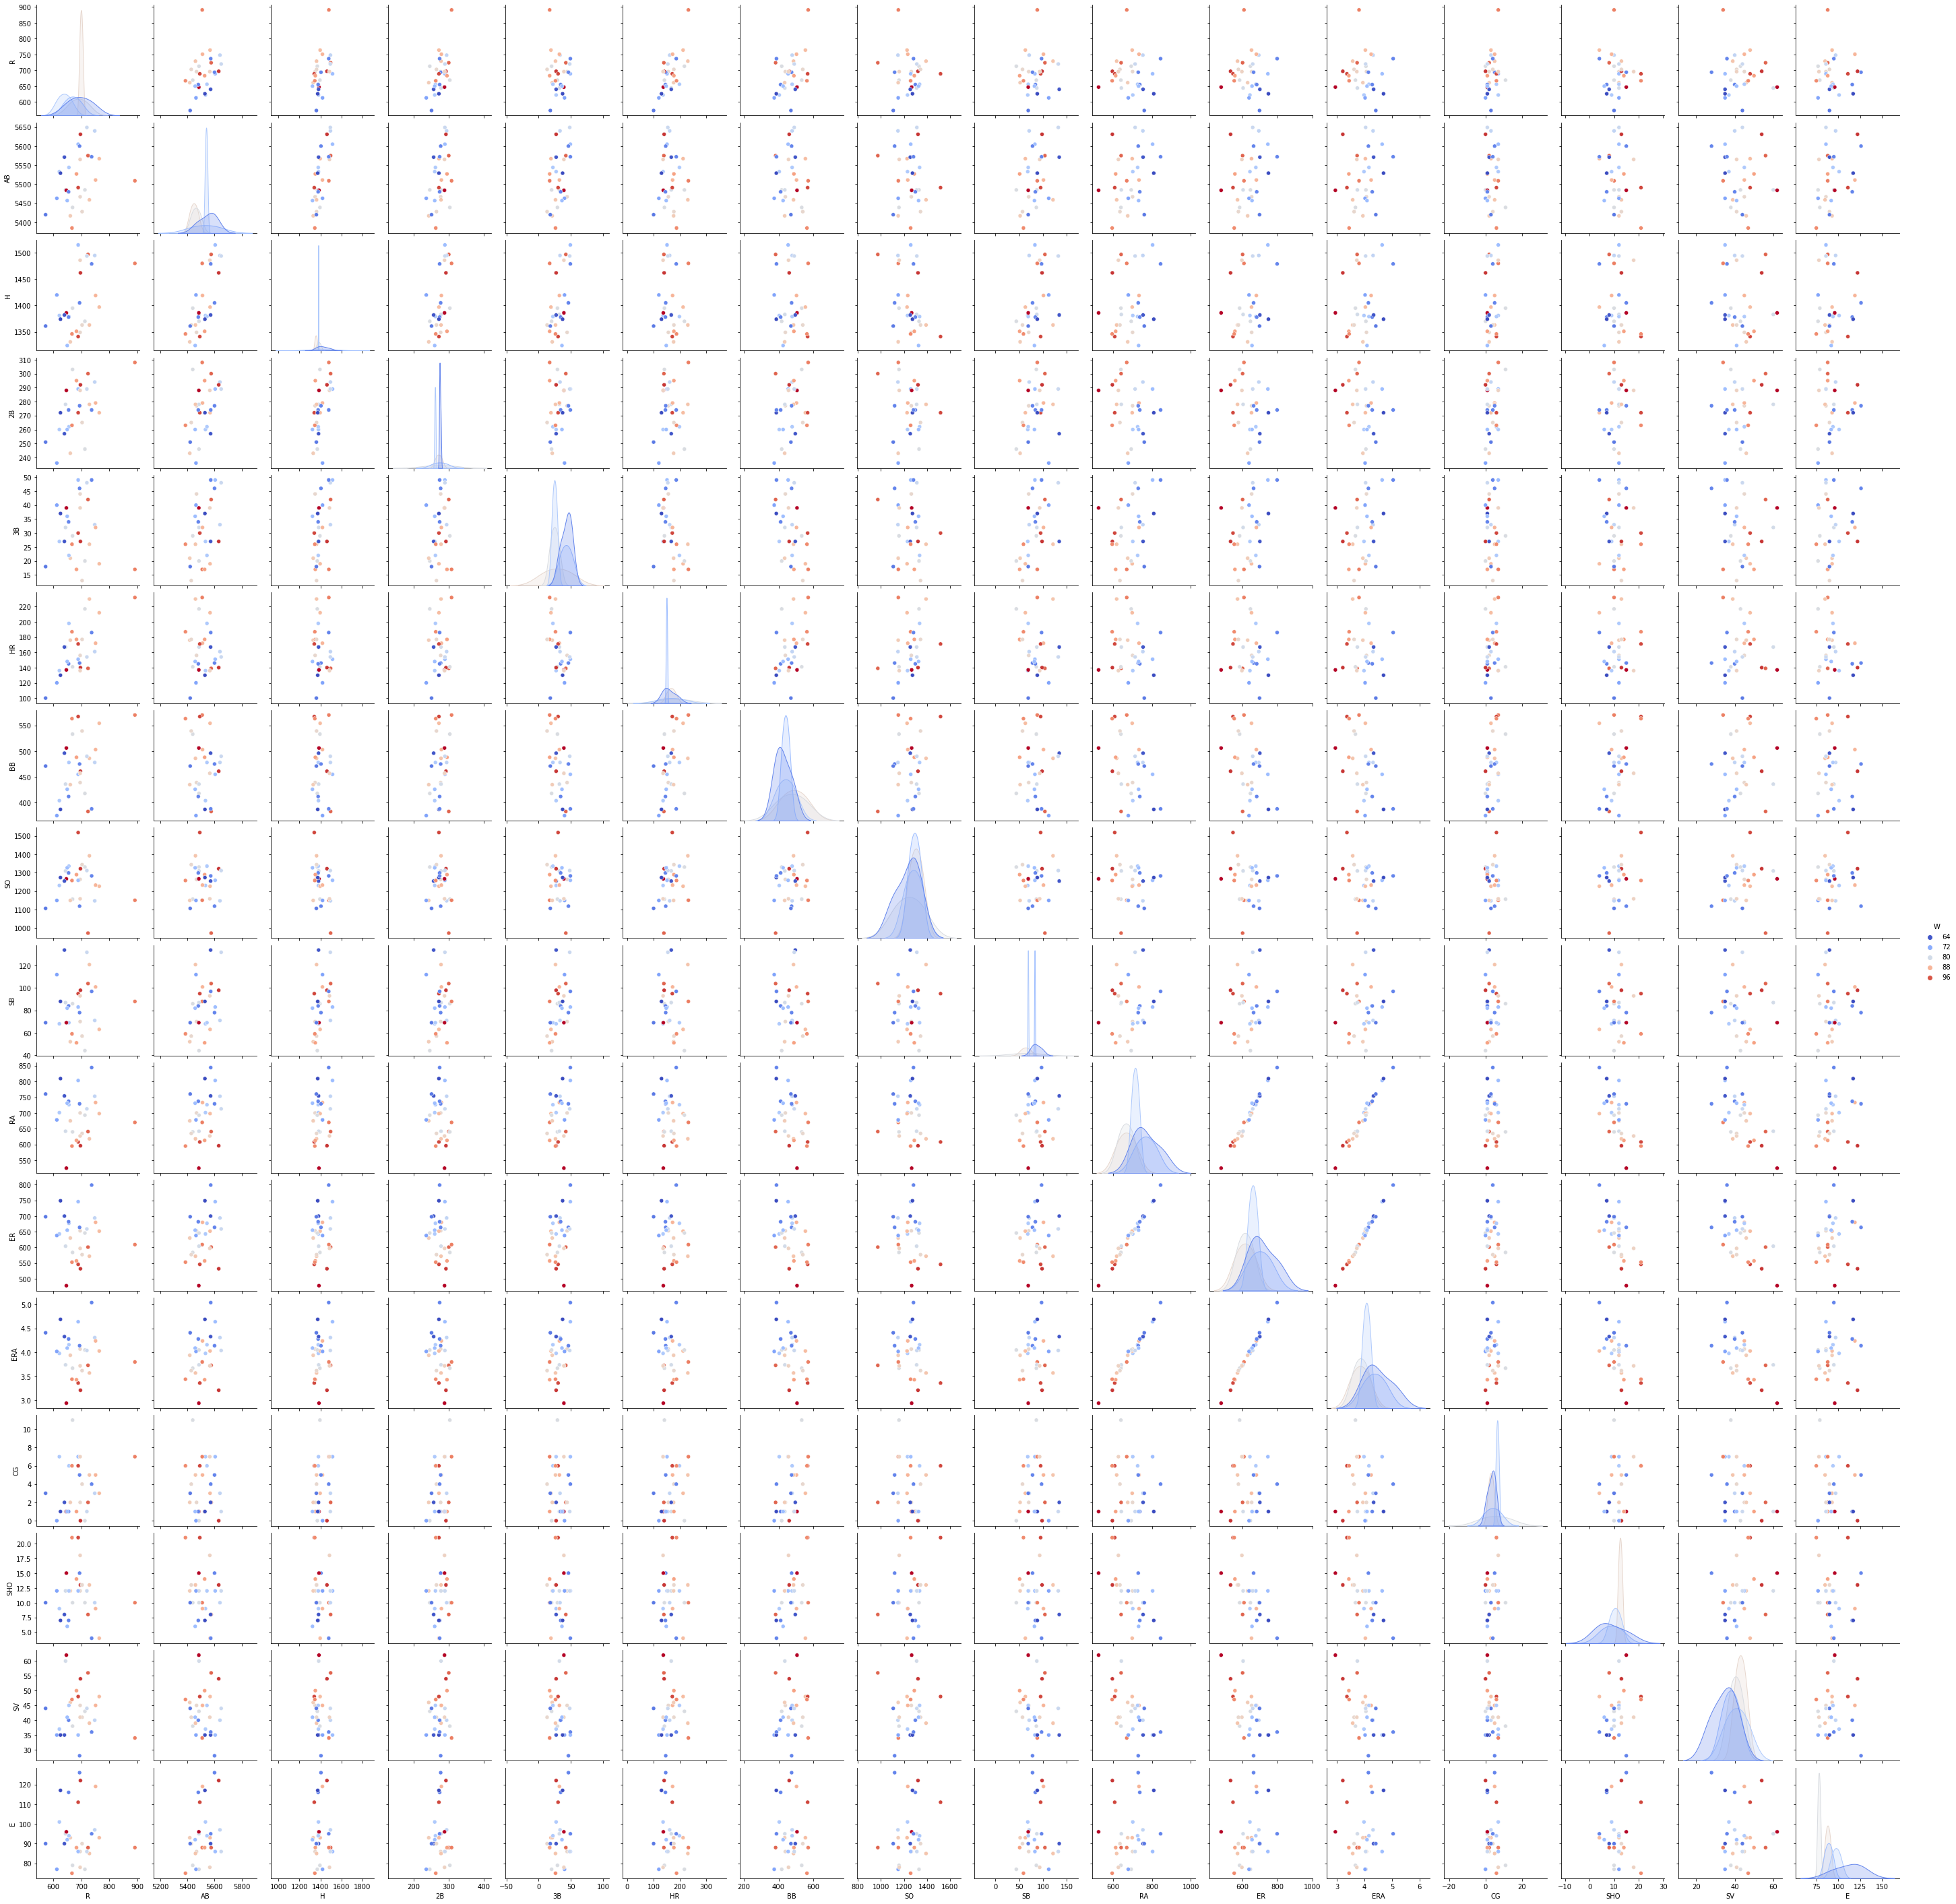

In [25]:
# Multivarite Analysis
sns.pairplot(baseball_dt, vars=['R', 'AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG','SHO','SV','E'],hue='W',palette="coolwarm")
plt.show()

It can be observed that Run and win are linearly correlated and we have outliers prresent btw 850 and 900
It can be observed that AB,Hit,Home runs,walk are slighlty related to Wins and there is no outlier
It can be observed that Double is linearly related to Win with no outlier but left skewed.
It can be observed that Tripple is negatively correlated with with Win but with no outliers
It can be observed that SO, strikeout is not corelated with Win with no outlier
It can be observed that Runs, Earned Runs, Saves allowed is highly correlated with Wins and no outliers
It can be observed that Errors are not correlated to win and the data has outliers

# 3: Feature Selection/Extraction- to identify the most relevant features

<AxesSubplot:>

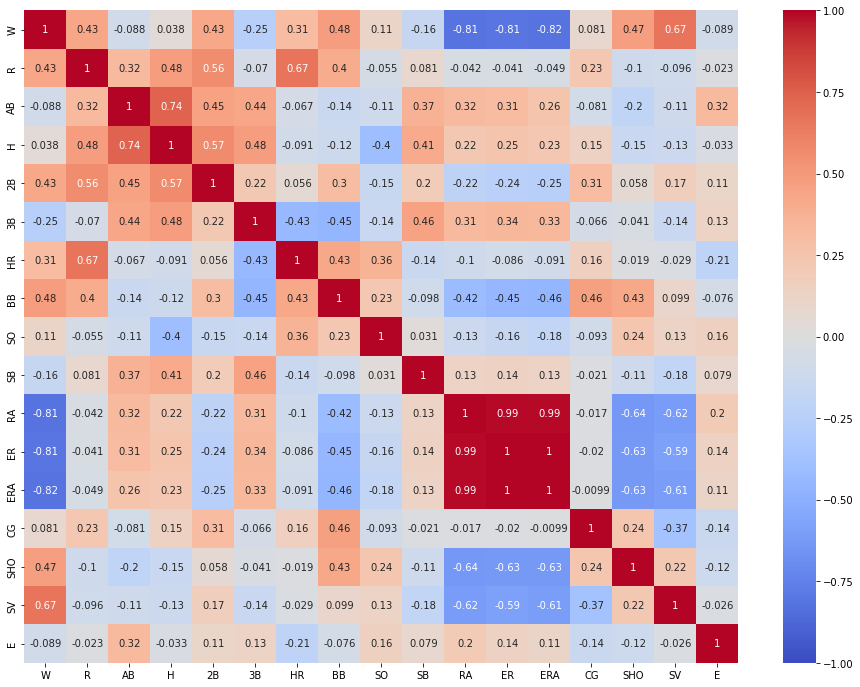

In [26]:
# Having a look at the correlation matrix
plt.figure(figsize=(16,12))
mask = np.zeros_like(baseball_dt.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=baseball_dt.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

The number of runs, home runs, doubles, Saves, Shutouts, and Walks are highly positively linearly correlated
Stolen Bases, Runs Allowed, Earned Runs are highly negative linearly correlated.

# 4: Data Preprocessing

In [27]:
# Separating feature data and Label data
X = baseball_dt.drop(['W'],axis=1)
y = baseball_dt['W']

In [28]:
# Standardizing the dataset for X
from sklearn.preprocessing import StandardScaler
stdscalar= StandardScaler()
X_Scalar= stdscalar.fit_transform(X)
#X_Scalar

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_Scalar, y, test_size = 0.20,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((24, 16), (6, 16), (24,), (6,))

# 5: Build/Test multiple models on the same dataset

In [30]:
# Linear Regression
lreg=LinearRegression()

In [31]:
lreg.fit(X_train,y_train)

LinearRegression()

In [32]:
y_pred_lreg= lreg.predict(X_test)
y_pred_lreg.shape

(6,)

In [33]:
# Model Accuracy
#lr=metrics.accuracy_score(y_test, y_pred)*100
print("Mean squared error: %.1f" % mean_squared_error(y_test,y_pred_lreg))
print('\n')
print("Mean absolute error: %.2f" % mean_absolute_error(y_test,y_pred_lreg))
print('\n')
print('R2 Score: %.2f' % r2_score(y_test,y_pred_lreg))
print('\n')

Mean squared error: 27.9


Mean absolute error: 3.89


R2 Score: 0.79




In [34]:
# Decision Tree
from sklearn import tree
DT=tree.DecisionTreeClassifier()
DT.fit(X_train,y_train)
y_pred_dt=DT.predict(X_test)
y_pred_dt.shape


(6,)

In [35]:
# Model Accuracy
print("Mean squared error: %.1f" % mean_squared_error(y_test,y_pred_dt))
print('\n')
print("Mean absolute error: %.2f" % mean_absolute_error(y_test,y_pred_dt))
print('\n')
print('R2 Score: %.2f' % r2_score(y_test,y_pred_dt))
print('\n')

Mean squared error: 77.3


Mean absolute error: 7.67


R2 Score: 0.41




In [36]:
# Support Vector Machine
svmModel=SVC(kernel='rbf',random_state=1)
svmModel.fit(X_train,y_train)

SVC(random_state=1)

In [37]:
#Predicting the test set result
y_pred_svm=svmModel.predict(X_test)
y_pred_svm.shape

(6,)

In [38]:
# Model Accuracy
print("Mean squared error: %.1f" % mean_squared_error(y_test,y_pred_svm))
print('\n')
print("Mean absolute error: %.2f" % mean_absolute_error(y_test,y_pred_svm))
print('\n')
print('R2 Score: %.2f' % r2_score(y_test,y_pred_svm))
print('\n')

Mean squared error: 349.3


Mean absolute error: 14.33


R2 Score: -1.65




In [39]:
# Random Forest Classifier
clf = RandomForestClassifier(n_estimators = 100, max_depth = 50 ,max_features = 3, bootstrap = True, random_state = 18) #
clf.fit(X_train, y_train.ravel())

RandomForestClassifier(max_depth=50, max_features=3, random_state=18)

In [40]:
clf_pred = clf.predict(X_test)
clf_pred.shape

(6,)

In [41]:
# Model Accuracy
print("Mean squared error: %.1f" % mean_squared_error(y_test,clf_pred))
print('\n')
print("Mean absolute error: %.2f" % mean_absolute_error(y_test,clf_pred))
print('\n')
print('R2 Score: %.2f' % r2_score(y_test,clf_pred))
print('\n')

Mean squared error: 65.0


Mean absolute error: 7.00


R2 Score: 0.51




In [42]:
# Extra Tree Classifier
et =ExtraTreesClassifier(n_estimators=100) 
et.fit(X_train,y_train)
et_pred=et.predict(X_test)
et_pred.shape

(6,)

In [43]:
# Model Accuracy
print("Mean squared error: %.1f" % mean_squared_error(y_test,et_pred))
print('\n')
print("Mean absolute error: %.2f" % mean_absolute_error(y_test,et_pred))
print('\n')
print('R2 Score: %.2f' % r2_score(y_test,et_pred))
print('\n')

Mean squared error: 92.0


Mean absolute error: 7.67


R2 Score: 0.30




In [44]:
# Using Gradient Boosting Classifier
xgbreg = XGBRegressor(random_state = 0)
# Fit the model
xgbreg.fit(X_train, y_train)
et_xgb = xgbreg.predict(X_test)
et_xgb.shape

(6,)

In [45]:
# Model Accuracy
print("Mean squared error: %.1f" % mean_squared_error(y_test,et_xgb))
print('\n')
print("Mean absolute error: %.2f" % mean_absolute_error(y_test,et_xgb))
print('\n')
print('R2 Score: %.2f' % r2_score(y_test,et_xgb))
print('\n')

Mean squared error: 71.9


Mean absolute error: 5.89


R2 Score: 0.45




# 6: Cross Validation of all the  models on the same dataset

In [46]:
k_folds = KFold(n_splits = 3)

In [47]:
# Create an SVM model and a random forest model
svm = SVC(kernel='linear', C=1, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
lr=LinearRegression()
DT=tree.DecisionTreeClassifier(random_state=42)
#clf = RandomForestClassifier(n_estimators = 100, random_state = 18)
xgbreg = XGBRegressor(random_state = 0)
et =ExtraTreesClassifier(n_estimators=100,random_state=42) 

# Perform 5-fold cross-validation for both models
cv_results_svm =cross_validate(svm, X_Scalar, y, cv=k_folds)
cv_results_rf = cross_validate(rf, X_Scalar, y, cv=k_folds)
cv_results_lr = cross_validate(lr,X_Scalar, y, cv=k_folds)
cv_results_dt = cross_validate(DT, X, y, cv=k_folds)
#cv_results_clf = cross_validate(clf, X, y, cv=k_folds)
cv_results_xgbreg = cross_validate(xgbreg, X, y, cv=k_folds)
cv_results_et = cross_validate(et, X, y, cv=k_folds)

# Print the results
print("SVM:", cv_results_svm)
#print('SVM Average Score is',cv_results_svm.mean())
print('\n')
print("Random Forest:", cv_results_rf)
print('\n')
print("Logistic Result:", cv_results_lr)
print('\n')
print("Decision Tree:", cv_results_dt)
print('\n')
print("Extra Tree Classifier", cv_results_et)
print('\n')
print("Gradient Boosting Classifier:", cv_results_xgbreg)

SVM: {'fit_time': array([0.00100994, 0.00204873, 0.00102258]), 'score_time': array([0.00102663, 0.        , 0.        ]), 'test_score': array([0., 0., 0.])}


Random Forest: {'fit_time': array([0.09797454, 0.10648727, 0.10111761]), 'score_time': array([0.00947547, 0.00800014, 0.00831699]), 'test_score': array([0., 0., 0.])}


Logistic Result: {'fit_time': array([0.        , 0.00606346, 0.        ]), 'score_time': array([0.        , 0.00077581, 0.00101328]), 'test_score': array([-0.20007224,  0.63764742,  0.24007863])}


Decision Tree: {'fit_time': array([0.        , 0.        , 0.00174737]), 'score_time': array([0.        , 0.00606012, 0.00050449]), 'test_score': array([0., 0., 0.])}


Extra Tree Classifier {'fit_time': array([0.11766934, 0.07564402, 0.07500911]), 'score_time': array([0.00833869, 0.00831151, 0.00831461]), 'test_score': array([0.1, 0. , 0. ])}


Gradient Boosting Classifier: {'fit_time': array([0.03945255, 0.03470087, 0.04029703]), 'score_time': array([0.00067973, 0.   

In [48]:
svm_scores = cross_val_score(svm, X, y, cv = k_folds)
rf_scores = cross_val_score(rf, X, y, cv = k_folds)
lr_scores = cross_val_score(lr, X, y, cv = k_folds)
dt_scores = cross_val_score(DT, X, y, cv = k_folds)
xgbreg_scores= cross_val_score(xgbreg, X, y, cv = k_folds)
et_scores= cross_val_score(et, X, y, cv = k_folds)
#print("Cross Validation Scores: ", scores)
print("Average CV Score for Support Vector machine is : ", svm_scores.mean()*100)
print('\n')
print("Average CV Score for Random forest is : ", rf_scores.mean()*100)
print('\n')
print("Average CV Score for Linear regression is : ", lr_scores.mean()*100)
print('\n')
print("Average CV Score for Decision Tree is : ", dt_scores.mean()*100)
print('\n')
print("Average CV Score for Gradient Boosting Classifier is : ", xgbreg_scores.mean()*100)
print('\n')
print("Average CV Score for Extra Tree Classifier is : ", et_scores.mean()*100)
print('\n')

Average CV Score for Support Vector machine is :  0.0


Average CV Score for Random forest is :  0.0


Average CV Score for Linear regression is :  22.588460167737125


Average CV Score for Decision Tree is :  0.0


Average CV Score for Gradient Boosting Classifier is :  36.20424021302466


Average CV Score for Extra Tree Classifier is :  3.3333333333333335




In [49]:
from sklearn.model_selection import cross_val_score

np.random.seed(10)
def rmse_cv(model, x,y):
    rmse =- (cross_val_score(model, x,y, scoring='neg_mean_squared_error', cv=3))
    return(rmse)


models = [LinearRegression(),
          SVC(kernel='linear'),
         RandomForestClassifier(n_estimators=100, random_state=42),
         tree.DecisionTreeClassifier(random_state=42),
         XGBRegressor(random_state = 0),
         ExtraTreesClassifier(n_estimators=100,random_state=42),]
          
          
names = ['LR', 'svr', 'RF','DT','xgbreg','et']
          
for model,name in zip(models,names):
          score = rmse_cv(model,X,y)
          print("{}  : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR  : 59.608899, 6.992786
svr  : 115.466667, 45.662993
RF  : 113.100000, 30.972246
DT  : 161.666667, 39.418467
xgbreg  : 58.526042, 27.786745
et  : 117.133333, 44.705431


# 7: Hyperparameter tuning for extreme gradient boosting

In [50]:
from sklearn.model_selection import GridSearchCV
ridge_params = {'alpha':[1,2,3,4,5,6,7,8,9,10]}
et_grid = GridSearchCV(Ridge(), ridge_params, cv=3)
et_grid.fit(X_train, y_train)
print('Best score:', et_grid.best_score_*100)
print('Best score:', et_grid.best_params_)
print('Best score:', et_grid.best_estimator_)

Best score: 80.44547165720547
Best score: {'alpha': 2}
Best score: Ridge(alpha=2)


In [51]:
p_test3 = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=42), 
            param_grid = p_test3, scoring='accuracy',n_jobs=4, cv=3)
tuning.fit(X_train,y_train)
print('Best score:', tuning.best_score_*100)
print('Best params:', tuning.best_params_)
print('Best estimator:', tuning.best_estimator_)
#tuning.best_params_, tuning.best_score_
#tuning.best_params_, tuning.best_score_,tuning.best_estimator_

Best score: 4.166666666666666
Best params: {'learning_rate': 0.1, 'n_estimators': 100}
Best estimator: GradientBoostingClassifier(max_features='sqrt', random_state=42, subsample=1)


In [52]:
#xgbreg_grid.fit(X_train,y_train)
tunning_PRED=tuning.best_estimator_.predict(X_test)
tunning_PRED

array([74, 98, 71, 86, 68, 68], dtype=int64)

In [53]:
print('MSE:',mean_squared_error(tunning_PRED,y_test))
print('MAE:',mean_absolute_error(tunning_PRED,y_test))
print('r2_score:',r2_score(tunning_PRED,y_test)*100)

MSE: 68.33333333333333
MAE: 7.333333333333333
r2_score: 43.6426116838488


# 8.0 With Best Parameters

In [54]:
#RF = RandomForestRegressor()
param ={
       'n_estimators':[100],
      #'criterion':['mse'],
     'min_samples_split':[2],
    'min_samples_leaf':[1],
}

In [55]:
xgbreg_grid=GridSearchCV(GradientBoostingClassifier(),param,cv=3,scoring='accuracy',n_jobs=-1,verbose=2)

In [56]:
xgbreg_grid.fit(X_train,y_train)
xgbreg_grid_PRED=xgbreg_grid.best_estimator_.predict(X_test)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


In [57]:
print('MSE:',mean_squared_error(xgbreg_grid_PRED,y_test))
print('MAE:',mean_absolute_error(xgbreg_grid_PRED,y_test))
print('r2_score:',r2_score(xgbreg_grid_PRED,y_test)*100)

MSE: 131.16666666666666
MAE: 10.833333333333334
r2_score: -7.906764168190139


In [58]:
xgbreg_grid_PRED

array([64, 90, 71, 86, 95, 88], dtype=int64)

<AxesSubplot:xlabel='W', ylabel='Density'>

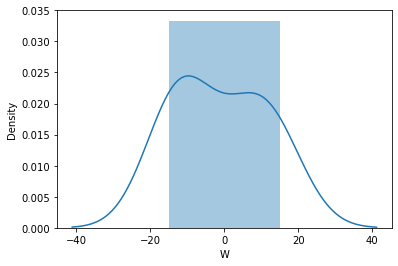

In [59]:
sns.distplot(xgbreg_grid_PRED-y_test)

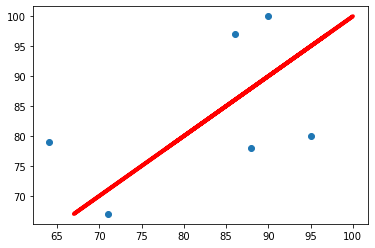

In [60]:
plt.scatter(xgbreg_grid_PRED,y_test)
plt.plot(y_test,y_test,linewidth=4,color='Red')

# 9.0 Saving the best Model

In [61]:
import joblib

In [62]:
joblib.dump(xgbreg_grid.best_estimator_,'Baseball_Win_Prediction_Project.obj')

['Baseball_Win_Prediction_Project.obj']

Project Outcome and Conclusion
The Exploratory Data and predictive analysis provided valuable insights imentiond below 
It can be observed that Run and win are linearly correlated and we have outliers prresent btw 850 and 900
It can be observed that AB,Hit,Home runs,walk are slighlty related to Wins and there is no outlier
It can be observed that Double is linearly related to Win with no outlier but left skewed.
It can be observed that Tripple is negatively correlated with with Win but with no outliers
It can be observed that SO, strikeout is not corelated with Win with no outlier
It can be observed that Runs, Earned Runs, Saves allowed is highly correlated with Wins and no outliers
It can be observed that Errors are not correlated to win and the data has outliers



After performing all neccesary data preprocessing and employed model such as linearRegression, Decsion Tree Regressor,Support Vector Machine,Random Forest Regressor,extreme gradient boosting and Gradient Boosting classifier to train and test the dataset,extreme gradient boosting overperfomed others with a better RMSE
extreme gradient boosting was hypertuned using Gridsearch technique and the one with the best optimal perfomacnce was choosen to predict the avocado average prrice.